In [ ]:
# Part 1 - Set up the Database
import sqlite3

connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

In [ ]:
# Create the Necessary Tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
  student_id INTEGER PRIMARY KEY AUTOINCREMENT,
  first_name TEXT NOT NULL,
  last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
  grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
  student_id INTEGER,
  subject TEXT NOT NULL,
  grade INTEGER,
  FOREIGN KEY (student_id) REFERENCES student(student_id)
)
''')

In [ ]:
# Insert Data into the Tables

student_data = [
    (1, 'Julien', 'Meyer'),
    (2, 'Parker', 'Schless'),
    (3, 'Madeleine', 'Grey'),
    (4, 'Hayley', 'Falk'),
    (5, 'John', 'McCone')
]

grade_data = [
    (1, 1, 'Math', 99),
    (2, 1, 'English', 96),
    (3, 1, 'Science', 97),
    (4, 2, 'Math', 92),
    (5, 2, 'English', 81),
    (6, 2, 'Science', 77),
    (7, 3, 'Math', 64),
    (8, 3, 'English', 87),
    (9, 3, 'Science', 76),
    (10, 4, 'Math', 94),
    (11, 4, 'English', 91),
    (12, 4, 'Science', 88),
    (13, 5, 'Math', 90),
    (14, 5, 'English', 79),
    (15, 5, 'Science', 87)
]

cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name)
VALUES (?, ?, ?)
''', student_data)

cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade)
VALUES (?, ?, ?, ?)
''', grade_data)

connection.commit()

In [ ]:
cursor.execute("SELECT * FROM grades")
rows = cursor.fetchall()
for row in rows:
  print(row)

(1, 1, 'Math', 99)
(2, 1, 'English', 96)
(3, 1, 'Science', 97)
(4, 2, 'Math', 92)
(5, 2, 'English', 81)
(6, 2, 'Science', 77)
(7, 3, 'Math', 64)
(8, 3, 'English', 87)
(9, 3, 'Science', 76)
(10, 4, 'Math', 94)
(11, 4, 'English', 91)
(12, 4, 'Science', 88)
(13, 5, 'Math', 90)
(14, 5, 'English', 79)
(15, 5, 'Science', 87)


In [ ]:
# Perform SQL Queries

print("Query 1: Retrieve all students' names and their grades:")
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')
joined_data = cursor.fetchall()
for row in joined_data:
  print(row)


print("\nQuery 2: Find the average grade for each student:")
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
average_data = cursor.fetchall()
for row in average_data:
  print(row)


print("\nQuery 3: Find the student with the highest average grade:")
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
highest_average_data = cursor.fetchone()
print(highest_average_data)


print("\nQuery 4: Find the average grade for the Math subject:")
cursor.execute('''
SELECT AVG(grade) AS average_math_grade
FROM grades
WHERE subject = 'Math'
''')
math_average_data = cursor.fetchone()
print(math_average_data)


print("\nQuery 5: List all students who scored above 90 in any subject:")
cursor.execute('''
SELECT students.first_name, students.last_name
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
GROUP BY students.student_id
''')
above_90_data = cursor.fetchall()
for row in above_90_data:
  print(row)


Query 1: Retrieve all students' names and their grades:
('Julien', 'Meyer', 'Math', 99)
('Julien', 'Meyer', 'English', 96)
('Julien', 'Meyer', 'Science', 97)
('Parker', 'Schless', 'Math', 92)
('Parker', 'Schless', 'English', 81)
('Parker', 'Schless', 'Science', 77)
('Madeleine', 'Grey', 'Math', 64)
('Madeleine', 'Grey', 'English', 87)
('Madeleine', 'Grey', 'Science', 76)
('Hayley', 'Falk', 'Math', 94)
('Hayley', 'Falk', 'English', 91)
('Hayley', 'Falk', 'Science', 88)
('John', 'McCone', 'Math', 90)
('John', 'McCone', 'English', 79)
('John', 'McCone', 'Science', 87)

Query 2: Find the average grade for each student:
('Julien', 'Meyer', 97.33333333333333)
('Parker', 'Schless', 83.33333333333333)
('Madeleine', 'Grey', 75.66666666666667)
('Hayley', 'Falk', 91.0)
('John', 'McCone', 85.33333333333333)

Query 3: Find the student with the highest average grade:
('Julien', 'Meyer', 97.33333333333333)

Query 4: Find the average grade for the Math subject:
(87.8,)

Query 5: List all students who 

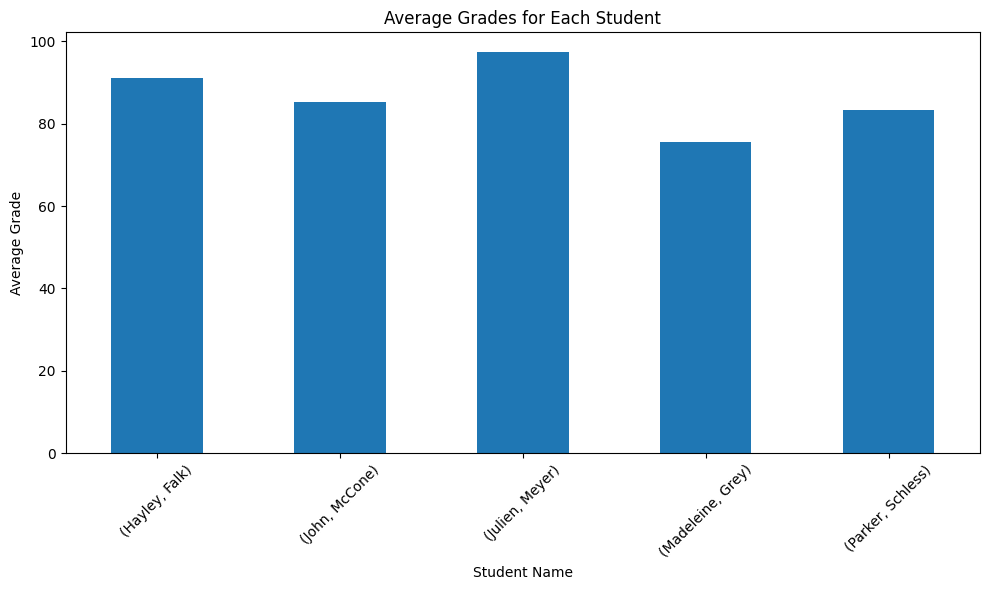

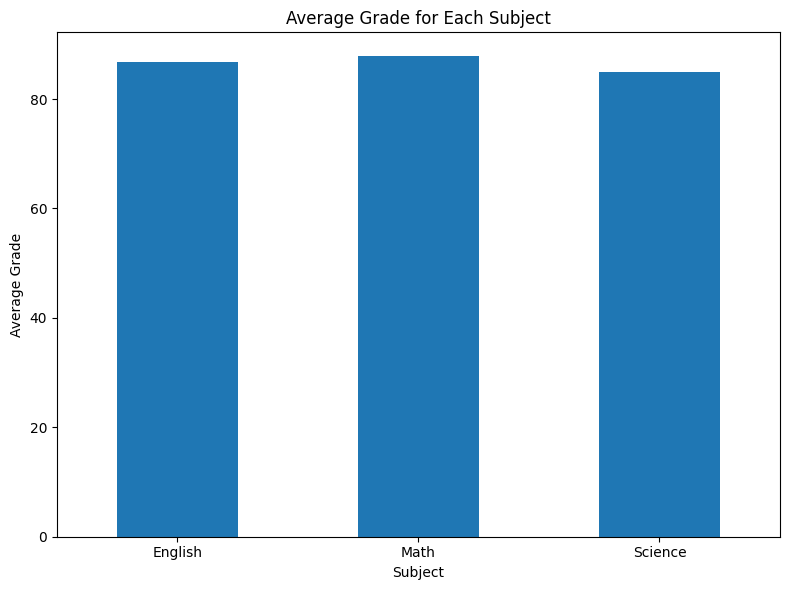

In [ ]:
# Load Data into Pandas

import pandas as pd

students_df = pd.read_sql_query("SELECT * FROM students", connection)
grades_df = pd.read_sql_query("SELECT * FROM grades", connection)

joined_df = pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''', connection)

!pip install matplotlib==3.7.1

average_grades = joined_df.groupby(['first_name', 'last_name'])['grade'].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
average_grades.plot(kind='bar')
plt.title('Average Grades for Each Student')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



average_subject_grades = joined_df.groupby('subject')['grade'].mean()

plt.figure(figsize=(8, 6))
average_subject_grades.plot(kind='bar')
plt.title('Average Grade for Each Subject')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
